# Entrega - Tarea 2

### Grupo 2:
     - Darío Rosa 3813883-9
     - Diego Aleman 4952936-0
     - Gabriel Kryger 4933558-9



## 1. Objetivo

El objetivo de esta tarea es construir un clasificador utilizando el Algoritmo ID3 en su variante que permite el manejo de atributos continuos.
Para medir el éxito del aprendizaje vamos a utilizar las medidas accuracy, precision, recall y medida F1, utilizando para su cálculo la librería sklearn. 

## 2. Diseño

TODO: 
1. hablar del uso de id
2. justificar porque no creamos mas columnas en los valores discretos(no es necesario ya que en este caso tenemos control sobre el algoritmo y los valores son tomados como valores independientes)
3. explicar las deciciones tomadas al momento de falta de arbol con el valor de un atributo, etc


En esta sección se deben presentar las decisiones tomadas a la hora de implementar el jugador, clasificador, etc.


## 2.1 Preprocesamiento de datos
- Decisiones sobre tratamiento de datos numéricos, faltantes, etc. antes de la aplicación de el algoritmo
- Selección/generación de atributos


## 2.2 Algoritmo
Extensiones del algoritmo original necesarias para la resolución del problema: tratamiento de atributos faltantes, numéricos, etc. (si es el propio algoritmo el que lo maneja), implementaciones adicionales necesarias para manejar ensambles de clasificadores, etc.


## 2.3 Evaluación
- Qué conjunto de métricas se utilizan para la evaluación de la solución y su definición
- Sobre qué conjunto(s) se realiza el entrenamiento, ajuste de la solución, evaluación, etc. Explicar cómo se construyen estos conjuntos.

## 3. Experimentación

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler as oversampler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
import math

#Carga de datos y prueba con sicklearn:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [30]:
#funcion para imprimir las metricas
def PrintMetrics(Y_train, predict):
    print("Accuracy -> "+str(acc (Y_train, predict)))
    print("Precision -> "+str(precision (Y_train, predict)))
    print("Recall -> "+str(recall (Y_train, predict)))
    print("F1 -> "+str(f1 (Y_train, predict)))
    print("Matriz de Confusión:")
    tn, fp, fn, tp = confusion_matrix(Y_train, predict).ravel()
    print("      1        0")
    print(" 1    {:<8} {:<8} ".format(tp, fp))
    print(" 0    {:<8} {:<8} ".format(fn, tn))

In [31]:
#modificamos los enumerados a valores reales discretos

df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], [1,0])
df['gender'] = df['gender'].replace(['Male', 'Female', 'Other'], [0,1,2])
df['work_type'] = df['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0,1,2,3,4])
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'], [1,0])
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0,1,2,3])
del df["id"] #el id no puede ir ya que hace sobreajuste


In [32]:
import g02_l2_core
import numpy as np
dfGlobal = df.copy()
#1022 test size porque es el 20%, 5110 datos en total
df_train, df_test = train_test_split(dfGlobal, test_size=0.2, random_state=42)

#en el conjunto de entrenamiento, cambiamos los valores null por la media
media = df_train['bmi'].median()
df_train['bmi'] = df_train['bmi'].replace(['N/A'], [media])
df_train['bmi'] = df_train['bmi'].fillna(media)


In [33]:
#Prueba con 7 niveles
maxTreeLevels = 7
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)



Accuracy -> 0.9344422700587084
Precision -> 0.14285714285714285
Recall -> 0.016129032258064516
F1 -> 0.028985507246376815
Matriz de Confusión:
      1        0
 1    1        6        
 0    61       954      


In [34]:
#Prueba con 10 niveles
maxTreeLevels = 10
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.9315068493150684
Precision -> 0.21428571428571427
Recall -> 0.04838709677419355
F1 -> 0.07894736842105263
Matriz de Confusión:
      1        0
 1    3        11       
 0    59       949      


In [35]:
#Prueba con el maximo de niveles
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, None)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.9315068493150684
Precision -> 0.21428571428571427
Recall -> 0.04838709677419355
F1 -> 0.07894736842105263
Matriz de Confusión:
      1        0
 1    3        11       
 0    59       949      


Parte C 

In [36]:
dfDistribuida = df.copy()

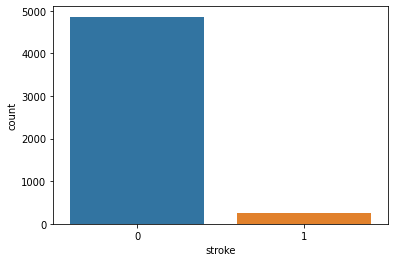

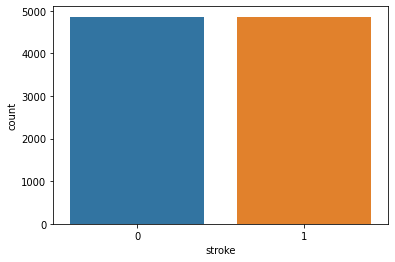

In [37]:

#distribucion del stroke
sns.countplot(data = dfDistribuida, x="stroke")
plt.show()
ros = oversampler(random_state=42)
X = dfDistribuida[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = dfDistribuida.stroke
X, Y = ros.fit_resample(X,Y)
dfDistribuida = X
dfDistribuida["stroke"] = Y

sns.countplot(data = dfDistribuida, x="stroke")
plt.show()


In [38]:
df_train, df_test = train_test_split(dfDistribuida, test_size=0.2, random_state=42)

#en el conjunto de entrenamiento, cambiamos los valores null por la media
media = df_train['bmi'].median()
df_train['bmi'] = df_train['bmi'].replace(['N/A'], [media])
df_train['bmi'] = df_train['bmi'].fillna(media)

#Prueba con maximo niveles
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, None)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.8344473007712082
Precision -> 0.78125
Recall -> 0.9278350515463918
F1 -> 0.8482563619227144
Matriz de Confusión:
      1        0
 1    900      252      
 0    70       723      


Comparacion con sklearn

In [ ]:
dfSkLearn = df.copy()

In [42]:
#Comparacion con sklearn
#prueba con el algoritmo de sklearn

#sklearn no soporta nan, entonces como son pocos, optamos por ponerles tambien la media para estas pruebas
media = dfSkLearn['bmi'].median()
dfSkLearn['bmi'] = dfSkLearn['bmi'].replace(['N/A'], [media])
dfSkLearn['bmi'] = dfSkLearn['bmi'].fillna(media)


X = dfSkLearn[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = dfSkLearn.stroke
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt_clf = tree.DecisionTreeClassifier(criterion="entropy")
dt_clf = dt_clf.fit(X_train, Y_train)
Y_pred = dt_clf.predict(X_test)

PrintMetrics(Y_train, Y_pred)


- Presentar los distintos experimentos que se realizan y los resultados que se obtienen.

- La información de los resultados se presenta en tablas y en gráficos, de acuerdo a su naturaleza. Por ejemplo:

_En la gráfica 1, se observa el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos para el oponente X_

In [ ]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

<table>
  <tr>
    <th>$\alpha$</th>
    <th>...</th>
    <th>Turnos</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>...</td>
    <td>100</td>
    <td>0.991</td>
  </tr>    
  <tr>
    <td>0.005</td>
    <td>...</td>
    <td>100</td>
    <td>0.987</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.05</td>
    <td>...</td>
    <td>100</td>
    <td>0.329</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>...</td>
    <td>100</td>
    <td>0.564</td>
  </tr>    
    <caption>Tabla 1 - Entrenamiento del jugador X para distintos valores de $\alpha$</caption>
</table>


## 4. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 
- ¿cuándo se dieron los mejores resultados del jugador?
- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
- ¿cómo mejoraría los resultados?